In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt

### Sampling distribution

The sampling distribution represents the distribution of a point estimate based on multiple samples of the same size taken from the same population.

The sampling distribution of the sample mean, for a sufficiently large number of samples, is normal: centered around the population mean and with standard deviation equal to the standard error of the sample mean.

In this example we represent three sampling distributions from three different populations (normal, exponential and uniform) as we increase the size of the sample distribution. We will then compare the theoretical standard error to the obtained standard deviation. The latter should be closer to the former as we increase the number of samples which we take from the population.

In [2]:
# Generating and plotting the original populations
SIZE_POPULATION = 10000

normal_population = np.random.normal(loc = 3.21, scale = 2.44, size = SIZE_POPULATION)
uniform_population = np.random.uniform(low = -2.35, high = -1.12, size = SIZE_POPULATION)
exponential_population = np.random.exponential(scale= 1.23, size = SIZE_POPULATION)

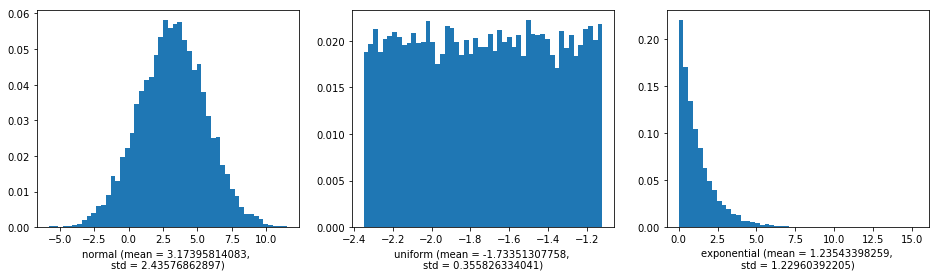

In [3]:
fig, axarray = plt.subplots(1,3)

def plot_distribution(population, ax, label, bins=50):
    mean = np.mean(population)
    std = np.std(population)
    
    weights = np.ones_like(population)/float(len(population))
    ax.hist(population, bins=bins, weights=weights)
    ax.set_xlabel(label + ' (mean = ' + str(mean) + ', \nstd = ' + str(std) + ')')
    
    return(mean, std)
    
(mean_normal, std_normal) = plot_distribution(normal_population, axarray[0], 'normal')
(mean_uniform, std_uniform) = plot_distribution(uniform_population, axarray[1], 'uniform')
(mean_exponential, std_exponential) = plot_distribution(exponential_population, axarray[2], 'exponential')

fig.set_figwidth(16)

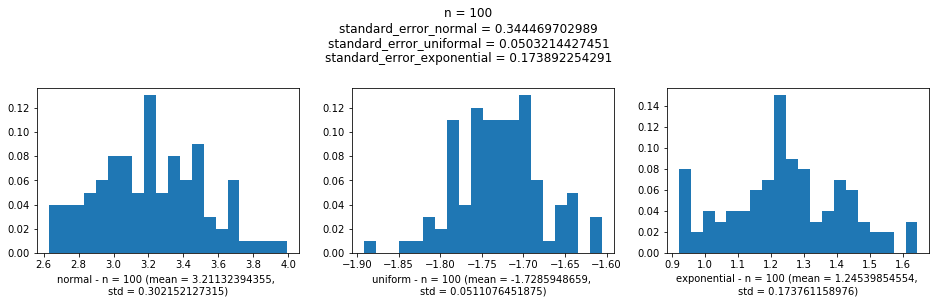

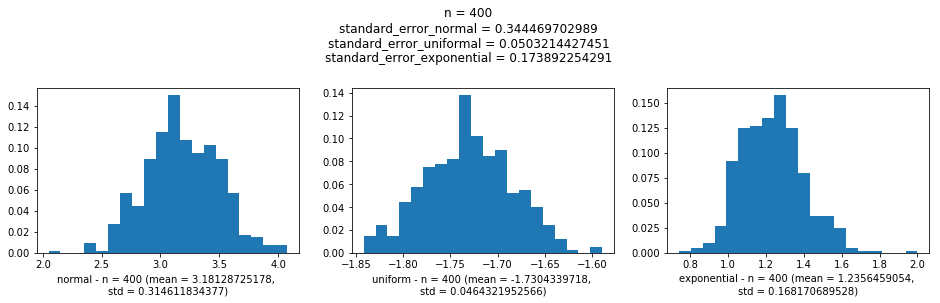

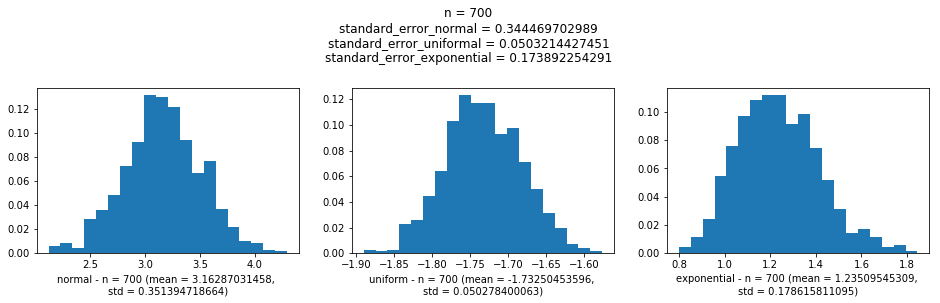

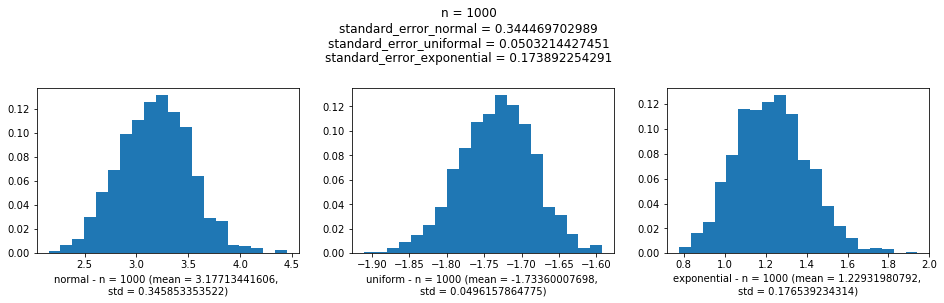

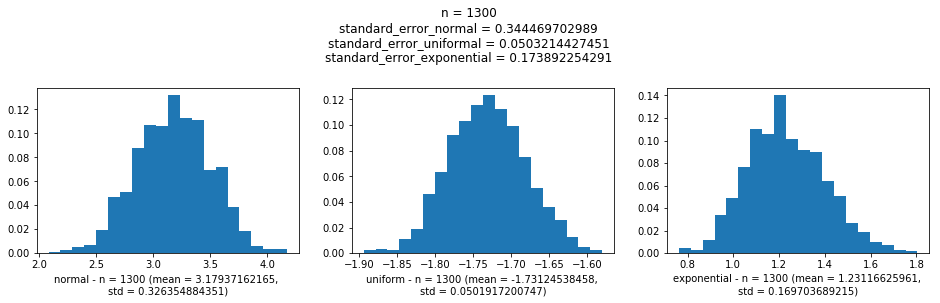

In [4]:
N = [100,400,700,1000,1300]
SIZE_SAMPLE = 50

for n in N:
    fig, axarray = plt.subplots(1,3)
    
    def sampling_distribution(population, ax, n, label):
        means = []
        for i in range(0,n):
            # Generating samples without replacement
            sample = np.random.choice(population, size = SIZE_SAMPLE, replace = False)
            means.append(np.mean(sample))
        plot_distribution(means, ax, label + ' - n = ' + str(n), 20)
    
    sampling_distribution(normal_population, axarray[0], n, 'normal')
    sampling_distribution(uniform_population, axarray[1], n, 'uniform')
    sampling_distribution(exponential_population, axarray[2], n, 'exponential')
    
    def compute_std_error(std):
        return std / math.sqrt(SIZE_SAMPLE)
    
    plt.suptitle('n = ' + str(n) + 
                 '\nstandard_error_normal = ' + str(compute_std_error(std_normal)) + 
                 '\nstandard_error_uniformal = ' + str(compute_std_error(std_uniform)) + 
                 '\nstandard_error_exponential = ' + str(compute_std_error(std_exponential))
                )
    
    fig.set_figwidth(16)
    fig.subplots_adjust(top=0.7)

### Confidence level

The confidence level is not a probability, but a measure of how certain we are that the actual value of the population statistic is within the confidence interval of the point estimate. Additionally, if we take a high number of samples from the population, the proportion of confidence intervals computed from those samples which contain the point estimate will be close to the confidence interval. 

The plot below shows the confidence intervals of the sample mean for a given number of samples taken from the same population. The vertical red line represents the point estimate which was calculated from the first sample. 

Proportion of confidence intervals containing the population mean: 0.9


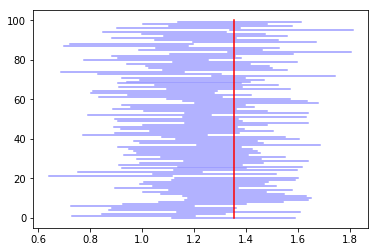

In [5]:
import scipy.stats as st

NUMBER_CIs = 100
CONFIDENCE_LEVEL = 0.95
SIZE_SAMPLE = 1000
SIZE_POPULATION = 10000

z = st.norm.ppf(CONFIDENCE_LEVEL)

normal_population = np.random.normal(loc = 1.23, scale = 4.56, size = SIZE_POPULATION)

standard_error = np.std(normal_population)/math.sqrt(SIZE_SAMPLE)
mean_population = np.mean(normal_population)

cis = []
in_ci = 0
for i in range(0,NUMBER_CIs):
    sample = np.random.choice(normal_population, size = SIZE_SAMPLE, replace = False)
    mean = np.mean(sample)
    cis.append([mean - z*standard_error, mean, mean + z*standard_error])
    
    if mean_population > cis[-1][0] and mean_population < cis[-1][2]:
        in_ci = in_ci + 1
    
fig, ax = plt.subplots()
for i in range(0,NUMBER_CIs):
    ax.plot([cis[i][0], cis[i][2]], [i,i], color='#9999FFFF')
ax.plot([cis[0][1],cis[0][1]],[0,100],color='red')  

print('Proportion of confidence intervals containing the population mean: ' + 
       str(in_ci/float(NUMBER_CIs)))